In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


<b>Data Cleaning

In [3]:
df = df[['Country' , 'EdLevel', 'YearsCodePro' , 'Employment' , 'ConvertedCompYearly']] #to make it simple and keep the important attributes
df = df.rename({'ConvertedCompYearly' : 'Salary'} , axis = 1)
df['Country'] = df['Country'].replace({'United States of America' : 'United States'})
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
df = df[df["Salary"].notnull()]          #entries where the df["Salary"] is not null
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [6]:
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
dtype: int64

In [7]:
df = df.dropna()        #drop all the rows that does not have a value or is null
                        #alternatively we can fill the columns with the mean value of the column 
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
df = df[df["Employment"] == "Employed, full-time"]        #To select only the full time developers
df = df.drop("Employment", axis=1)         #Drop the column as we dont need it further
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [9]:
#no. of data points country wise
df['Country'].value_counts()

Country
United States                                           10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [10]:
#since many countries have very less data like Guyana so get rid of them
def shortenCategories(category , limit):
    category_map = {}
    for i in range(len(category)):
        if(category.values[i] >= limit):
            category_map[category.index[i]] = category.index[i]
        else:
            category_map[category.index[i]] = 'others'
    return category_map
    

In [11]:
country_map = shortenCategories(df['Country'].value_counts() , 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()


Country
United States                                           10569
others                                                   9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


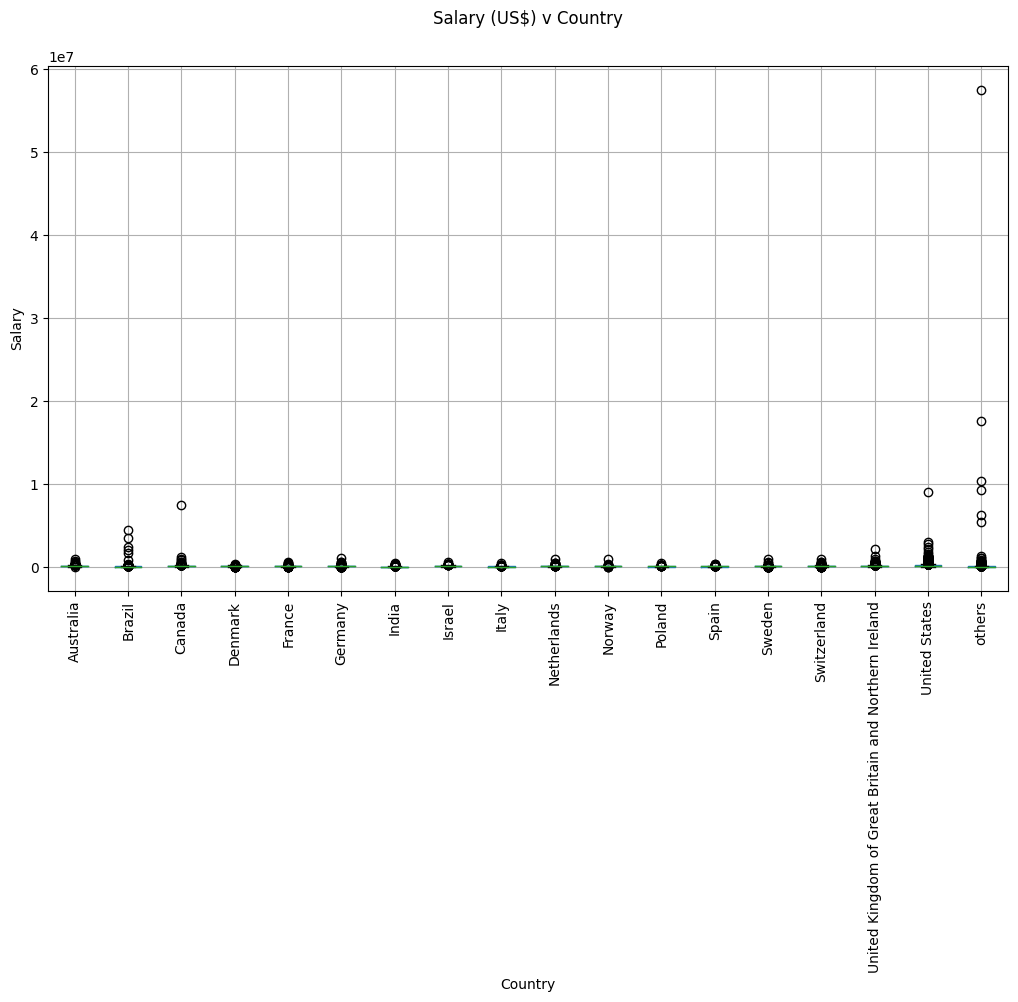

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df[df['Salary'] <= 0.2e7]

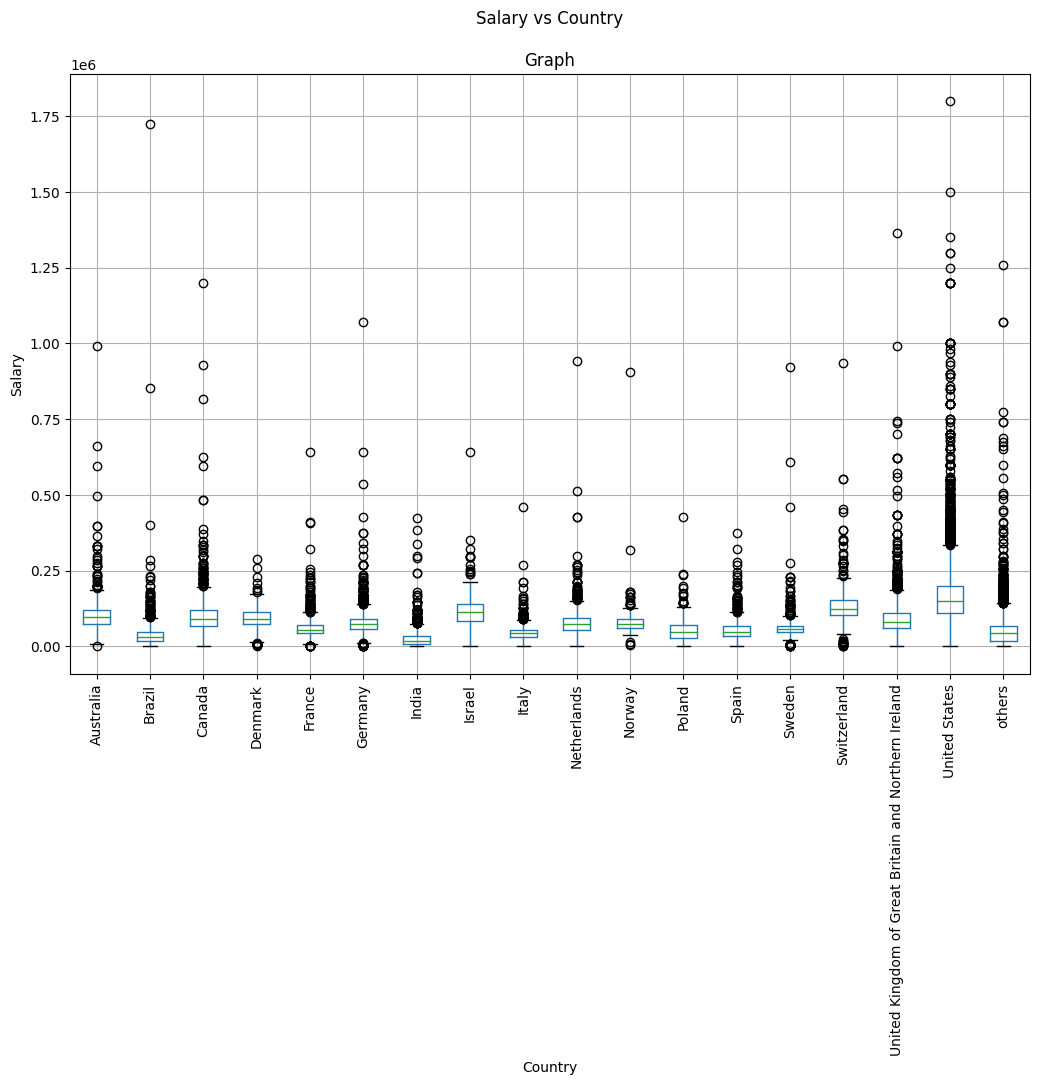

In [16]:
fig , ax = plt.subplots(1 , 1 , figsize = (12 , 8) )
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle("Salary vs Country")
plt.title('Graph')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation = 90)

plt.show()

In [17]:
df = df[df['Salary'] >= 10000]
df = df[df['Salary'] <= 0.5e6]


In [19]:
#After limiting the extremes drop the others countries
df = df[df['Country'] != 'others'] 

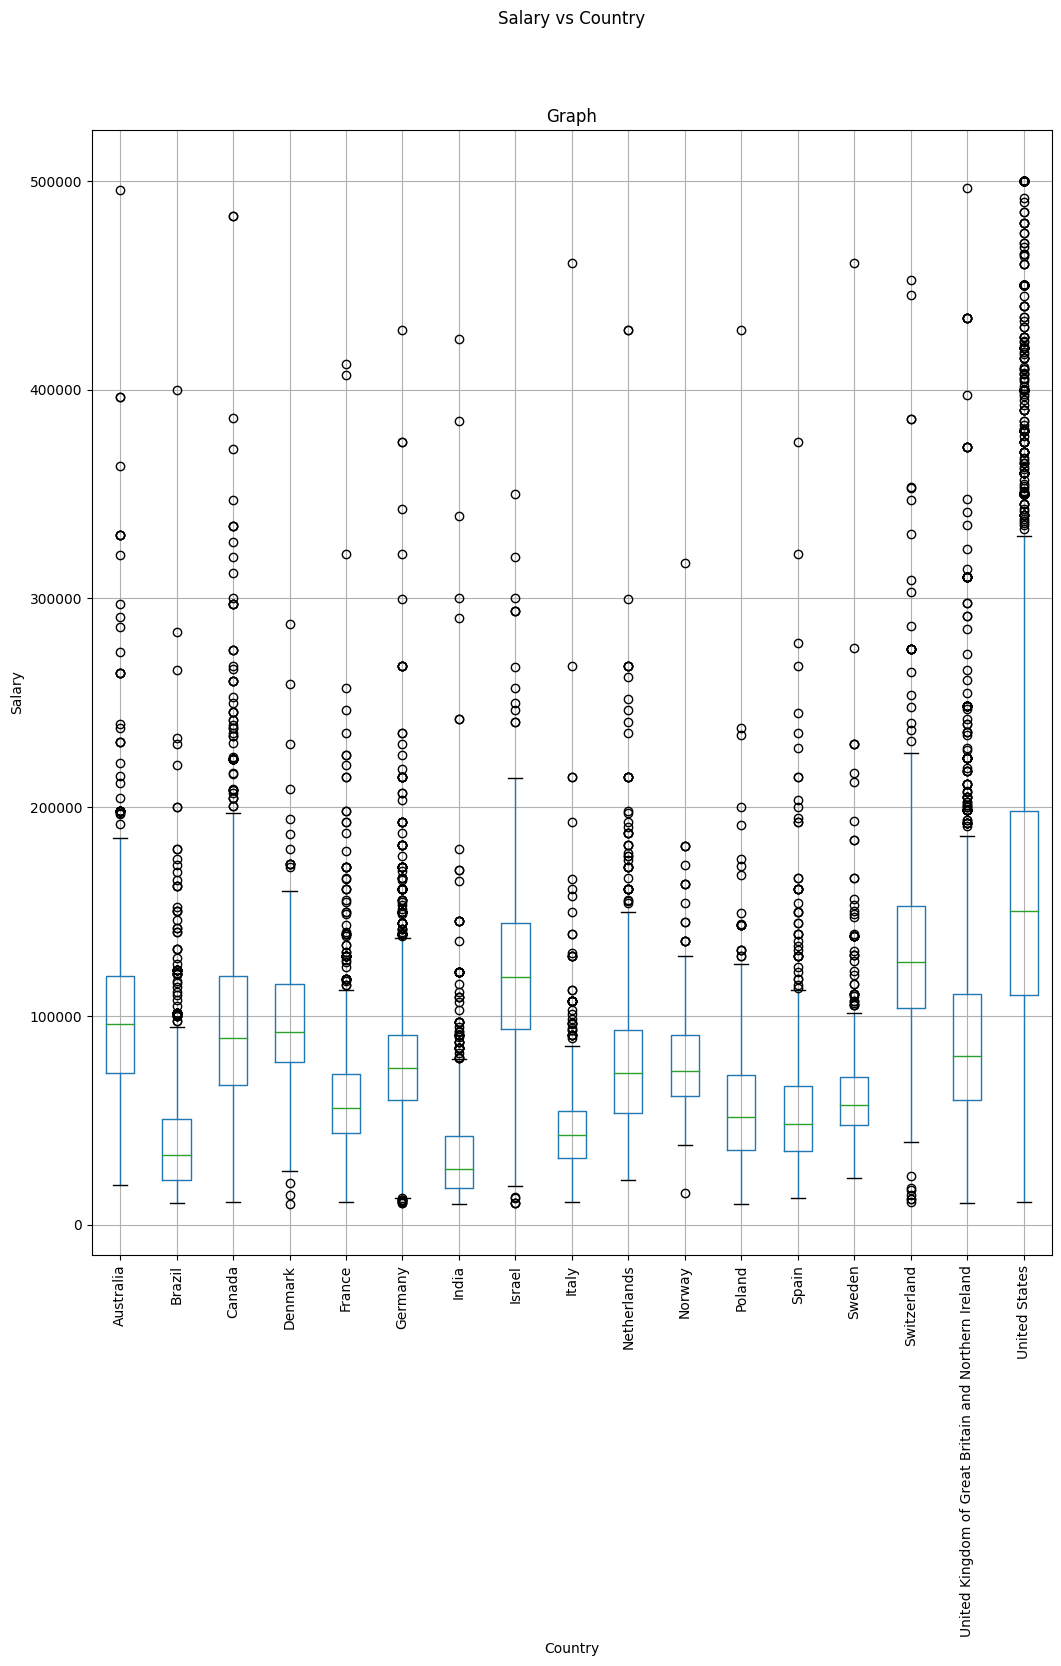

In [20]:
fig , ax = plt.subplots(1 , 1 , figsize = (12 , 15) )
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle("Salary vs Country")
plt.title('Graph')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation = 90)

plt.show()

In [21]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '21', '3', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [23]:
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year' , 0.5)

In [24]:
df['YearsCodePro'].unique()

array([ 9. , 23. ,  7. , 21. ,  3. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,
       15. , 19. , 13. , 16. , 28. , 24. , 25. , 12. ,  4. , 20. ,  8. ,
       18. , 30. , 27. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. , 11. ,
       34. , 42. , 26. , 31. , 36. , 39. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [25]:
#Or make a funtion to apply
def cleanExperience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
    
df["YearsCodePro"] = df["YearsCodePro"].apply(cleanExperience)

In [26]:
df['YearsCodePro'].unique()

array([ 9. , 23. ,  7. , 21. ,  3. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,
       15. , 19. , 13. , 16. , 28. , 24. , 25. , 12. ,  4. , 20. ,  8. ,
       18. , 30. , 27. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. , 11. ,
       34. , 42. , 26. , 31. , 36. , 39. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [27]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [28]:
#Cleaning the education attribute
def cleanEducation(x):
    if 'Bachelor' in x:
        return "Bachelor's Degree"
    if 'Master' in x:
        return "Master's Degree"
    if "Professional" in x or "Doctoral" in x:
        return "Post Grad"
    return "Less than Bachelor"

df['EdLevel'] = df["EdLevel"].apply(cleanEducation)

In [29]:
df["EdLevel"].unique()

array(["Bachelor's Degree", 'Less than Bachelor', "Master's Degree",
       'Post Grad'], dtype=object)

In [30]:
#Since many datatype in the data are not in floating point numbers like EdLevel
from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()

df['EdLevel'] = obj.fit_transform(df['EdLevel'])
print(df['EdLevel'].unique())

[0 1 2 3]


In [31]:
country = LabelEncoder()
df["Country"] = country.fit_transform(df['Country'])
df['Country'].unique()
# df.head()                                

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

<h1>ML Model</h1>

In [32]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(df ,test_size = 0.2)

In [33]:
train_X = train.drop('Salary', axis = 1)  #features
test_X = test.drop('Salary' , axis = 1)

train_y = train['Salary']   #To predict
test_y = test['Salary']

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_y.values)


LinearRegression()

In [35]:
#Predict the value
y_pred = lr.predict(test_X)

In [36]:
#Evaluate the prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(test_y, y_pred))
print(error)

62910.80089548358


In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(train_X , train_y.values)

DecisionTreeRegressor(random_state=0)

In [38]:
dtr_pred = dtr.predict(test_X)

In [39]:
error = np.sqrt(mean_squared_error(dtr_pred , test_y))
print(error)

53572.27012260698


In [40]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 0)
rfr.fit(train_X , train_y.values)

RandomForestRegressor(random_state=0)

In [41]:
rfr_pred = rfr.predict(test_X)


In [42]:
error = np.sqrt(mean_squared_error(test_y , rfr_pred))
print(error)

53187.24196669126


<h4>We can improve the model by using different parameters.</h4>
<h2>To find the best model with best parameter </h2>

In [43]:
from sklearn.model_selection import GridSearchCV

max_depth = np.array([None , 2 , 4, 6 , 8 , 10 , 12 , 14])
parameters = {"max_depth" : max_depth}

regressor = DecisionTreeRegressor(random_state = 0 )

gs = GridSearchCV(regressor , parameters , scoring = 'neg_mean_squared_error')
gs.fit(train_X , train_y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([None, 2, 4, 6, 8, 10, 12, 14], dtype=object)},
             scoring='neg_mean_squared_error')

In [44]:
gs_pred = gs.predict(test_X)

In [45]:
error = np.sqrt(mean_squared_error(test_y , gs_pred))
print(error)

52428.52066175661


In [46]:
regressor = gs.best_estimator_
regressor.fit(train_X , train_y.values)
pred = regressor.predict(test_X)

error = np.sqrt(mean_squared_error(pred , test_y))
print(error)

52428.52066175661


<H3>Test Object</H3>

In [86]:
new_X = np.array([["United States", "Master's Degree", 15]])
new_X

array([['United States', "Master's Degree", '15']], dtype='<U15')

In [87]:
#Clean the 'Education' column using the same preprocessing function
#new_X[:, 1] = cleanEducation(new_X[:, 1])

# Transform the 'Education' column using the same transformation object
new_X[:, 1] = obj.transform(new_X[:, 1])

# Transform the 'Country' column using the same LabelEncoder
new_X[:, 0] = country.transform(new_X[:, 0])


# Convert the entire array to float
new_X = new_X.astype(float)
print(new_X)

[[16.  2. 15.]]


In [88]:
y_pred = regressor.predict(new_X)
print(y_pred)

[199656.99261993]


C:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<h2>To use the model in the app we need to first save the model</h2>

In [89]:
import pickle

data = {"model": regressor, "le_country": country, "le_education": obj}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [90]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [91]:
y_pred = regressor_loaded.predict(new_X)
y_pred

C:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([199656.99261993])